In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install catboost
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.6 MB/s eta 0:00:00


In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb

In [4]:
# Load training data
X_train = pd.read_csv('/content/drive/MyDrive/DDOS/M2/Train_Test_Data/X_train.csv').to_numpy()
Y_train = pd.read_csv('/content/drive/MyDrive/DDOS/M2/Train_Test_Data/y_train.csv').to_numpy()

# Load testing data
X_test = pd.read_csv('/content/drive/MyDrive/DDOS/M2/Train_Test_Data/X_test.csv').to_numpy()
Y_test = pd.read_csv('/content/drive/MyDrive/DDOS/M2/Train_Test_Data/y_test.csv').to_numpy()


In [6]:
Models = ['XGboost', 'CatBoost', 'Random Forest', 'Decision Tree', 'LGBM']
accuracy_scores = []

In [ ]:
# xg boost

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# Set parameters for XGBoost
param = {
    'max_depth': 2,  # Maximum depth of a tree
    'eta': 0.3,  # Learning rate
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': 7  # Number of classes
}
num_round = 100  # Number of boosting rounds

# Train the XGBoost model
bst = xgb.train(param, dtrain, num_round)

# Make predictions
y_pred = bst.predict(dtest)

# Calculate accuracy
accuracy_xg = accuracy_score(Y_test, y_pred)
accuracy_scores.append(accuracy_xg)
print("Accuracy: %.2f%%" % (accuracy_xg * 100.0))

Accuracy: 99.75%


In [ ]:
# catboost

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=100,
                           learning_rate=0.5,
                           depth=3,
                           loss_function='MultiClass')

# Fit model
model.fit(X_train, Y_train)

# Get predictions
preds_class = model.predict(X_test)

# Calculate accuracy
accuracy_cb = accuracy_score(Y_test, preds_class)
accuracy_scores.append(accuracy_cb)
print("Accuracy: %.2f%%" % (accuracy_cb * 100.0))


0:	learn: 0.9446601	total: 217ms	remaining: 21.5s
1:	learn: 0.5951752	total: 363ms	remaining: 17.8s
2:	learn: 0.4961306	total: 561ms	remaining: 18.1s
3:	learn: 0.3516943	total: 749ms	remaining: 18s
4:	learn: 0.2956608	total: 855ms	remaining: 16.2s
5:	learn: 0.2468417	total: 947ms	remaining: 14.8s
6:	learn: 0.2233480	total: 1.01s	remaining: 13.5s
7:	learn: 0.2011744	total: 1.08s	remaining: 12.4s
8:	learn: 0.1648971	total: 1.18s	remaining: 11.9s
9:	learn: 0.1480065	total: 1.25s	remaining: 11.3s
10:	learn: 0.1323075	total: 1.33s	remaining: 10.7s
11:	learn: 0.1204843	total: 1.4s	remaining: 10.3s
12:	learn: 0.1114277	total: 1.47s	remaining: 9.83s
13:	learn: 0.1048465	total: 1.56s	remaining: 9.56s
14:	learn: 0.0975262	total: 1.63s	remaining: 9.26s
15:	learn: 0.0925063	total: 1.7s	remaining: 8.92s
16:	learn: 0.0862326	total: 1.77s	remaining: 8.62s
17:	learn: 0.0802257	total: 1.84s	remaining: 8.4s
18:	learn: 0.0778509	total: 1.91s	remaining: 8.14s
19:	learn: 0.0739936	total: 1.99s	remaining: 7

In [ ]:
# randomforeest

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=42,max_depth=10)

# Fit the model
rf_model.fit(X_train, Y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
accuracy_scores.append(accuracy_rf)
print("Random Forest Accuracy: %.2f%%" % (accuracy_rf * 100.0))

Random Forest Accuracy: 99.19%


In [ ]:
# decision tree

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=11,min_samples_split=2)

# Fit the model
dt_model.fit(X_train, Y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(Y_test, y_pred_dt)
accuracy_scores.append(accuracy_dt)
print("Decision Tree Accuracy: %.2f%%" % (accuracy_dt * 100.0))


Decision Tree Accuracy: 99.34%


In [7]:
# Create LightGBM datasets
train_data = lgb.Dataset(X_train, label=Y_train)
test_data = lgb.Dataset(X_test, label=Y_test, reference=train_data)

# Define parameters
params = {
    'objective': 'multiclass',            # Use 'multiclass' for multiple categories
    'metric': 'multi_logloss',            # Metric to evaluate performance
    'num_class': 7,                       # Number of classes
    'boosting_type': 'gbdt',              # Gradient Boosting Decision Tree
    'num_leaves': 50,                     # Number of leaves in one tree
    'learning_rate': 0.05,                # Learning rate
    'feature_fraction': 0.9               # Fraction of features to use
}

# Train the model
bst = lgb.train(params,
                train_data,
                num_boost_round=100,
                valid_sets=[test_data],
                callbacks=[lgb.early_stopping(10)]) # Use a callback for early stopping
# Predict on test data
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_class = y_pred.argmax(axis=1)  # Get the class with highest probability

# Calculate accuracy
accuracy_lgbm = accuracy_score(Y_test, y_pred_class)
accuracy_scores.append(accuracy_lgbm)
print("Accuracy: %.2f%%" % (accuracy_lgbm * 100.0))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16604
[LightGBM] [Info] Number of data points in the train set: 67791, number of used features: 70
[LightGBM] [Info] Start training from score -1.939675
[LightGBM] [Info] Start training from score -1.940496
[LightGBM] [Info] Start training from score -1.943067
[LightGBM] [Info] Start training from score -1.951546
[LightGBM] [Info] Start training from score -1.949575
[LightGBM] [Info] Start training from score -1.950405
[LightGBM] [Info] Start training from score -1.946678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.00629551
Accuracy: 99.83%


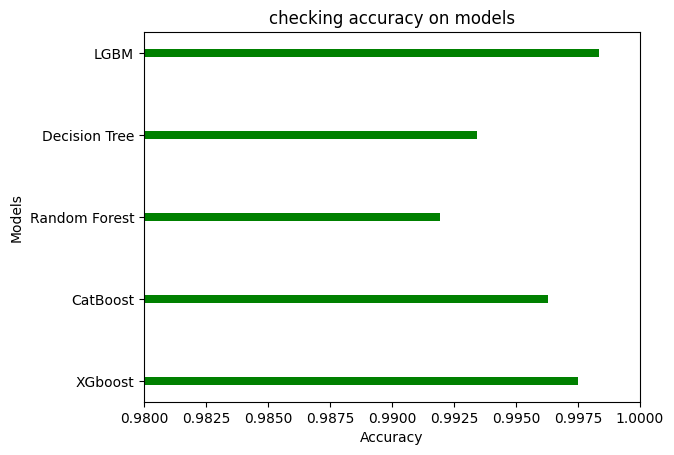

In [ ]:
plt.barh(Models, accuracy_scores,
        height = 0.1, color = "green")
plt.xlim(0.98, 1.0)
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.title("checking accuracy on models")
plt.show()

In [8]:
# confusion matrix
# Calculating the confusion matrix
cm = confusion_matrix(Y_test, y_pred_class)

cm


array([[4090,    0,    0,    0,    0,    0,    0],
       [   2, 4094,    0,    0,    2,    0,    0],
       [   8,    0, 4109,    0,    6,    0,    0],
       [   0,    0,    0, 4204,    1,    0,    0],
       [  15,    0,    5,    1, 4164,    1,    0],
       [   3,    0,    1,    0,    1, 4189,    0],
       [   0,    0,    1,    0,    1,    0, 4156]])

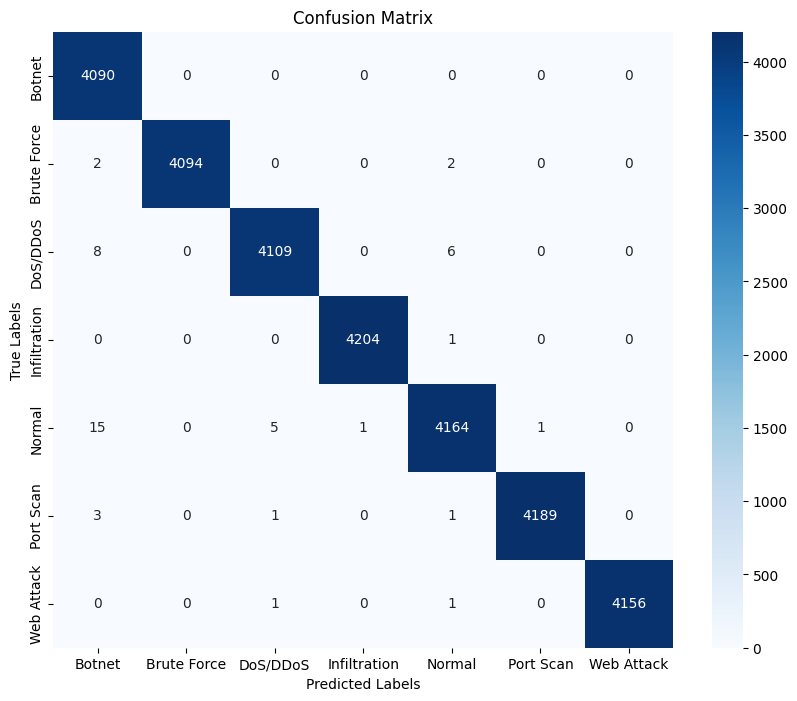

In [9]:
#[ 0=='Botnet' 1=='Brute Force' 2=='DoS/DDoS' 3=='Infiltration' 4=='Normal'  5=='Port Scan'  6=='Web Attack' ]

# Calculating the confusion matrix
cm = confusion_matrix(Y_test, y_pred_class)

# Ploting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Botnet', 'Brute Force', 'DoS/DDoS', 'Infiltration', 'Normal', 'Port Scan', 'Web Attack'],
            yticklabels=['Botnet', 'Brute Force', 'DoS/DDoS', 'Infiltration', 'Normal', 'Port Scan', 'Web Attack'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [10]:
# classsification report
report = classification_report(Y_test, y_pred_class)

print(report)


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4090
           1       1.00      1.00      1.00      4098
           2       1.00      1.00      1.00      4123
           3       1.00      1.00      1.00      4205
           4       1.00      0.99      1.00      4186
           5       1.00      1.00      1.00      4194
           6       1.00      1.00      1.00      4158

    accuracy                           1.00     29054
   macro avg       1.00      1.00      1.00     29054
weighted avg       1.00      1.00      1.00     29054



In [ ]:
# Save the trained model to a pickle file

filename = 'lgbm_model.pkl'
pickle.dump(bst, open(filename, 'wb'))


In [ ]:
# model to drive

!cp lgbm_model.pkl /content/drive/MyDrive/DDOS/M3


In [11]:
# Load the saved model
loaded_model = pickle.load(open('/content/drive/MyDrive/DDOS/M3/lgbm_model.pkl', 'rb'))

In [15]:
# checking for prediction
X_record = X_test[699].reshape(1, -1)
X_record

array([[1.23419075e-01, 8.30956243e-03, 1.24747387e-05, 1.37536447e-05,
        0.00000000e+00, 3.82978723e-08, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.15818432e-04, 4.10958904e-03,
        1.55159038e-03, 0.00000000e+00, 8.71643559e-09, 1.99994514e-06,
        1.73414157e-03, 3.32519731e-03, 4.15571302e-03, 4.29589916e-06,
        8.30532044e-03, 4.22304429e-03, 1.48489790e-05, 4.15995759e-03,
        4.21562324e-03, 8.30423957e-03, 4.22249470e-03, 1.69055210e-05,
        4.19480677e-03, 4.21463342e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 9.98243952e-01, 9.50566001e-01,
        9.97225284e-07, 1.50431151e-06, 0.00000000e+00, 2.56849315e-04,
        9.48366702e-04, 6.81066363e-04, 4.63320464e-07, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.42857143e-01,
        1.05374078e-03, 0.00000000e+00, 1.55159038e-03, 9.982439

In [13]:
Y_record = Y_test[699].reshape(1, -1)
Y_record

array([[0]])

In [16]:
# Checking predictions
predictions = loaded_model.predict(X_record)
predicted_class = np.argmax(predictions, axis=1)
print(predicted_class)


[0]
